In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# First import the data
mnist = datasets.load_digits()

In [3]:
# Split data into 25% test data and 75% training data 
trainData, testData, trainLabel, testLabel = train_test_split(np.array(mnist.data), 
                                                              mnist.target,
                                                              test_size=0.25,
                                                              random_state=42)

In [4]:
# Then split the data into training and validation test sets.
trainData, valData, trainLabel, valLabel = train_test_split(trainData, 
                                                         trainLabel,
                                                         test_size=0.1,
                                                         random_state=84)

In [5]:
# Print the dimensions of the training and test data.
print('The shape of the Training data : ', trainData.shape) 
print('The shape of the Testing data  : ', testData.shape)

The shape of the Training data :  (1212, 64)
The shape of the Testing data  :  (450, 64)


The image label of index 100 is 0.


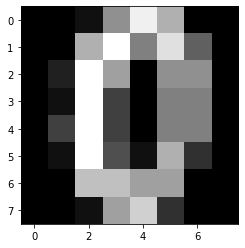

In [11]:
# For exploratory purposes, let's test the model's ability to recognize a random sample from the data in both the training and test data.
def image_show(i, data, label):
    x = data[i] # make the image a vector
    x = x.reshape((8,8)) # reshape it to 8x8 format -- known from the shape outputs above
    print('The image label of index %d is %d.' %(i, label[i]))
    plt.imshow(x, cmap='gray') # show the image
image_show(100, trainData, trainLabel) # select the 100th image from the training datas to display.

The image label of index 100 is 4.


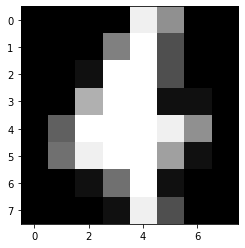

In [8]:
image_show(100, testData, testLabel)  # select the 100th image from the test data to display.

In [9]:
# Now let's find the optimal number of neighbors, k by evaluating the model's accuracy using an odd value of k from 1 to 30.
ks = np.arange(1,30,2)
 
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData,trainLabel)
    
    score = model.score(valData, valLabel)
    print("k=%d, accuracy= %.2f%%" % (k, score * 100))
# We can see that k=1 is the minimum k for the highest accuracy at 99.26% accuracy.

k=1, accuracy= 99.26%
k=3, accuracy= 99.26%
k=5, accuracy= 99.26%
k=7, accuracy= 99.26%
k=9, accuracy= 99.26%
k=11, accuracy= 99.26%
k=13, accuracy= 99.26%
k=15, accuracy= 99.26%
k=17, accuracy= 98.52%
k=19, accuracy= 98.52%
k=21, accuracy= 97.78%
k=23, accuracy= 97.04%
k=25, accuracy= 97.78%
k=27, accuracy= 97.04%
k=29, accuracy= 97.04%


In [10]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(trainData,trainLabel)
predictions = model.predict(testData)

print(classification_report(testLabel,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [12]:
# The model performs at 100% accuracy for digits of 0, 2, 6, and 7 and an overall accuracy of 98%.

# Resources:
# K-Nearest Neighbor Classification with Tensorflow on Fashion MNIST Dataset. (n.d.). Google Colaboratory.
# https://colab.research.google.com/github/FreeOfConfines/ExampleNNWithKerasAndTensorflow/blob/master/K_Nearest_Neighbor_Classification_with_Tensorflow_on_Fashion_MNIST_Dataset.ipynb#scrollTo=hvjiPiUazcV1 
    
#  K-NN for MNIST Classification. (2019, May 16). Back-Prop.
#  https://www.back-prop.com/deep_learning/knn/mnist/2019/05/16/knn_classifier/